In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Base de datos
fashion_mnist = keras.datasets.fashion_mnist

(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
test_inputs.shape

(10000, 28, 28)

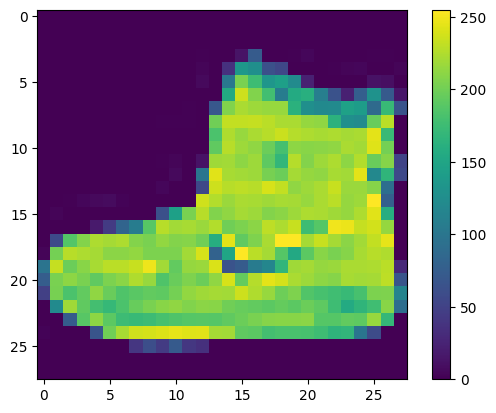

In [ ]:
plt.figure()
plt.imshow(train_inputs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalizacion
train_inputs = train_inputs / 255.0

test_inputs = test_inputs / 255.0

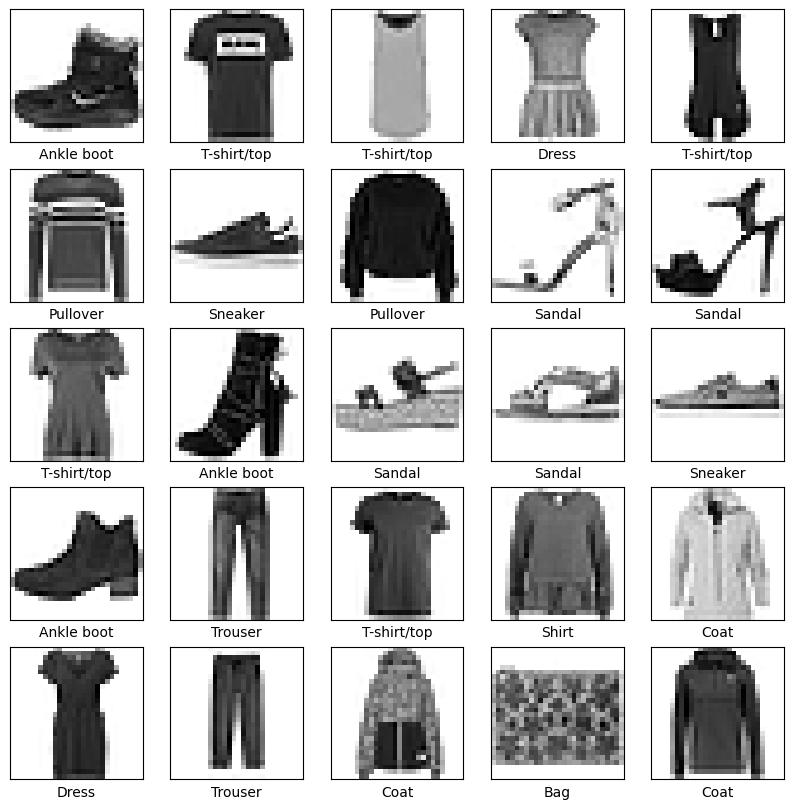

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
from keras import layers, models, Input

input_img = Input(shape=(28, 28, 1), name='input_layer')

# Extrae 64 mapas de características con filtros 3x3
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='conv1')(input_img)

#Max Pooling para reducir el tamaño espacial (submuestreo)
x = layers.MaxPooling2D(pool_size=(2, 2), name='maxpool1')(x)

#Normalización para acelerar el entrenamiento y reducir overfitting
x = layers.BatchNormalization(name='batchnorm1')(x)

x = layers.Flatten(name='flatten')(x)

x = layers.Dense(units=100, activation='relu', name='dense1')(x)

output = layers.Dense(units=10, activation='softmax', name='output_layer')(x)

model = models.Model(inputs=input_img, outputs=output, name="CNN_clasificador")

model.summary()

Model: "CNN_clasificador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm1 (BatchNormalization) │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │     1,254,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,256,406 (4.79 MB)

 Trainable params: 1,256,278 (4.79 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
from tensorflow.keras import losses

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_inputs, train_labels,
                epochs=5,
                batch_size=100,
                shuffle=True,
                validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 78s 129ms/step - accuracy: 0.9035 - loss: 0.2613 - val_accuracy: 0.8971 - val_loss: 0.2805
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 73s 122ms/step - accuracy: 0.9384 - loss: 0.1708 - val_accuracy: 0.9124 - val_loss: 0.2532
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 78s 116ms/step - accuracy: 0.9477 - loss: 0.1396 - val_accuracy: 0.9126 - val_loss: 0.2635
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 69s 115ms/step - accuracy: 0.9600 - loss: 0.1107 - val_accuracy: 0.9143 - val_loss: 0.2896
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.9677 - loss: 0.0907 - val_accuracy: 0.9042 - val_loss: 0.3318


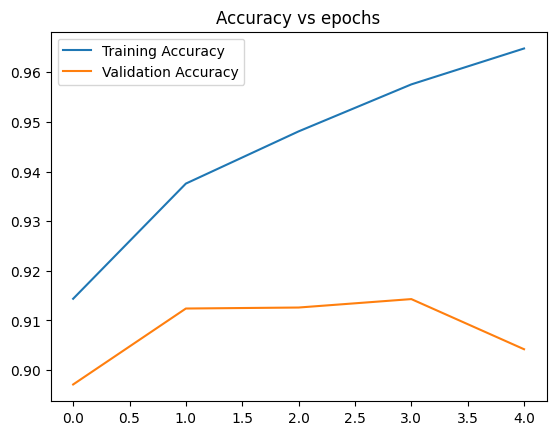

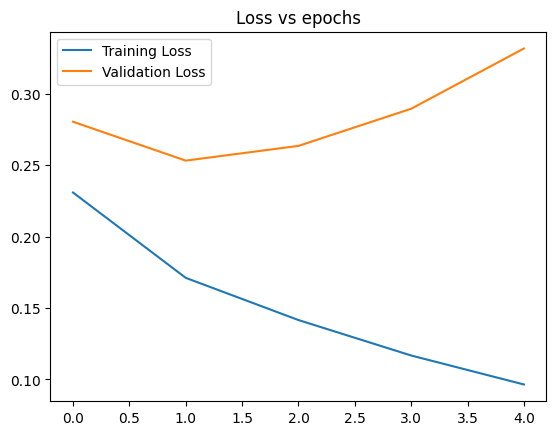

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
predictions = model.predict(test_inputs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


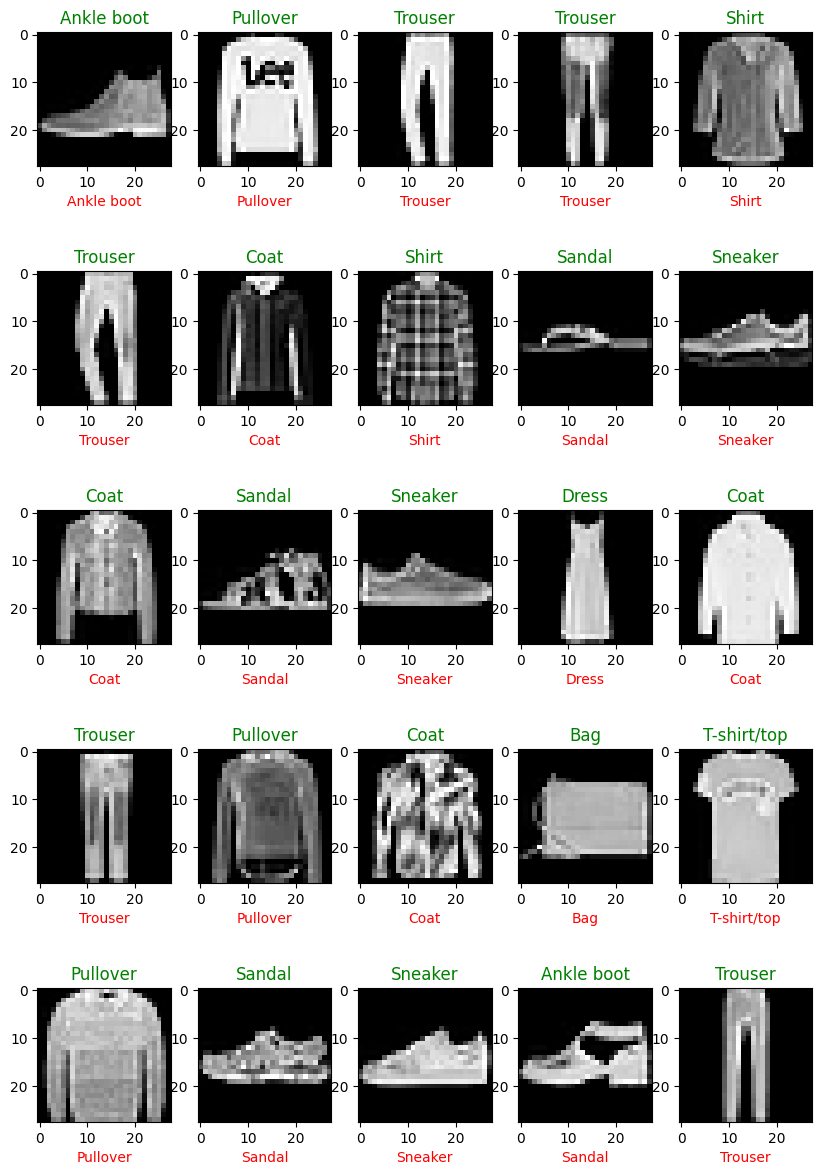

In [ ]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(class_names[test_labels[i]], color='g')
    plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

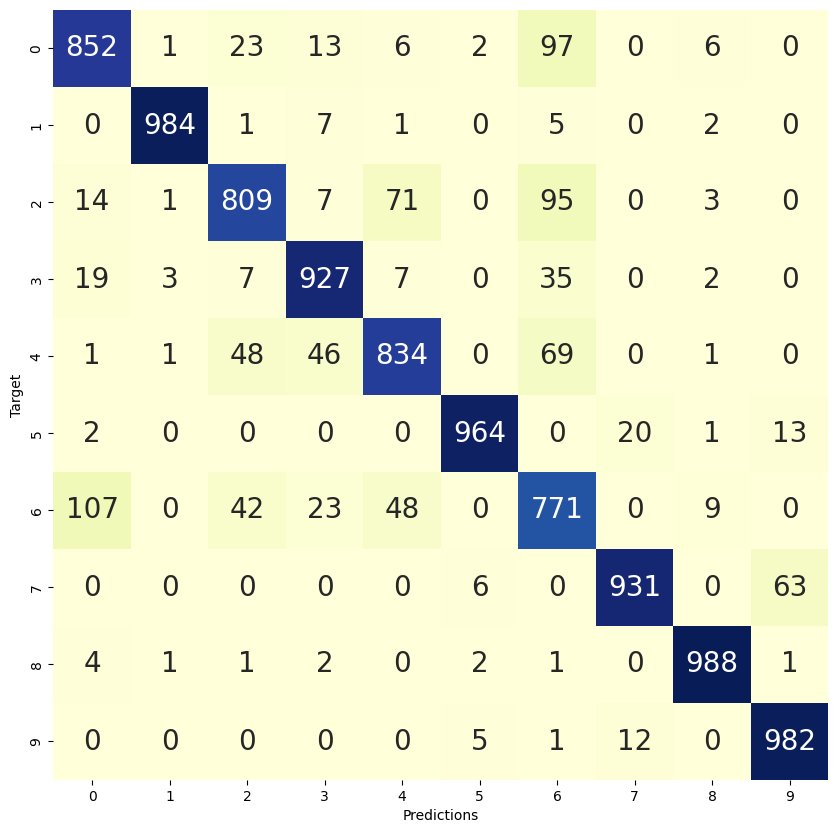

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');